# Assignment-3
# Build CNN Model for Classification Of Flowers
# Assignment date: 03-10-2022
# Student Name: H.NITHYASREE
# Student Roll.NO: 311519106065
# Maximum Marks: 2

In [13]:
pwd

'/content'

In [14]:
ls

drive/  Flowers-Dataset.zip  sample_data/


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd /content/drive/MyDrive/Flowerss

/content/drive/MyDrive/Flowerss


In [18]:
ls

Flowers-Dataset.zip


In [21]:
!unzip Flowers-Dataset.zip

unzip:  cannot find or open Flowers-Dataset.zip, Flowers-Dataset.zip.zip or Flowers-Dataset.zip.ZIP.


1.Import packages

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow
from tensorflow import keras

In [5]:
from keras  import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator as idm

In [6]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

2.Image Augmentation

In [23]:
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)


Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/Flowerss/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [24]:
test_flowers=idm(rescale=1./255)


Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/Flowerss/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


3.Create Model

In [25]:
model = Sequential()

4.Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [26]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

5.Compile The Model

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.Fit The Model

In [32]:
model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 10,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/10
44/44 [==============================] - 612s 14s/step - loss: 1.2779 - accuracy: 0.4427 - val_loss: 1.2415 - val_accuracy: 0.4749
Epoch 2/10
44/44 [==============================] - 63s 1s/step - loss: 1.1144 - accuracy: 0.5488 - val_loss: 1.1305 - val_accuracy: 0.5576
Epoch 3/10
44/44 [==============================] - 63s 1s/step - loss: 1.0530 - accuracy: 0.5854 - val_loss: 0.9976 - val_accuracy: 0.6328
Epoch 4/10
44/44 [==============================] - 63s 1s/step - loss: 0.9889 - accuracy: 0.6155 - val_loss: 0.9543 - val_accuracy: 0.6368
Epoch 5/10
44/44 [==============================] - 63s 1s/step - loss: 0.9267 - accuracy: 0.6532 - val_loss: 0.9133 - val_accuracy: 0.6630
Epoch 6/10
44/44 [==============================] - 64s 1s/step - loss: 0.8695 - accuracy: 0.6787 - val_loss: 0.8923 - val_accuracy: 0.6713
Epoch 7/10
44/44 [==============================] - 63s 1s/step - loss: 0.8366 - accuracy: 0.6796 - val_loss: 0.9747 - val_accuracy: 0.6435
Epoch 8/10
44/44 [

7.Save The Model

In [27]:
model.save('Flower.h5')

8.Test The Model

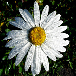

In [33]:
from keras_preprocessing import image
test_img=image.load_img('/content/drive/MyDrive/Flowerss/flowers/daisy/134409839_71069a95d1_m.jpg',target_size=(76,76))
test_img

In [34]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'daisy'

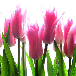

In [35]:
test_img1=image.load_img('/content/drive/MyDrive/Flowerss/flowers/tulip/112428919_f0c5ad7d9d_n.jpg',target_size=(76,76))
test_img1

In [36]:
x=image.img_to_array(test_img1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'tulip'

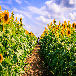

In [37]:
test_img2=image.load_img('/content/drive/MyDrive/Flowerss/flowers/sunflower/20704967595_a9c9b8d431.jpg',target_size=(76,76))
test_img2

In [38]:
x=image.img_to_array(test_img2)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'sunflower'

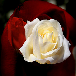

In [47]:
test_img3=image.load_img('/content/drive/MyDrive/Flowerss/flowers/rose/2325232198_751645d0bb_n.jpg',target_size=(76,76))
test_img3

In [48]:
x=image.img_to_array(test_img3)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'rose'

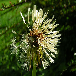

In [44]:
test_img4=image.load_img('/content/drive/MyDrive/Flowerss/flowers/dandelion/10683189_bd6e371b97.jpg',target_size=(76,76))
test_img4

In [45]:
x=image.img_to_array(test_img4)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(model.predict(x))
Prediction_category=['dandelion','daisy','rose','sunflower','tulip']
Prediction_category[predicted]

'dandelion'